# 🧮 Домашнее задание 3. Семинар 3
## Курс: *Алгоритмы и структуры данных*  
### Осень 2025

---
**Автор:** Артём Канаев  
---

## 📋 Содержание

 
 🔹 [Задача №1. Найти корень числа](#task1)  
 🔹 [Задача №2. Очень легкая задача](#task2)  
 🔹 [Задача №3. Накормить животных](#task3)  
 🔹 [Задача №4. Найти разницу между двух строк](#task4)  
 🔹 [Задача №5. Сумма двух элементов массива](#task5)  
 🔹 [Задача №6. Сортировка Шелла](#task6)  
 🔹 [Задача №7. Массив анаграмм](#task7)  



> 💡 *Все остальные файлы доступны в GitHub-репозитории:*  
> [https://github.com/nansleeper0/vk-hw](https://github.com/nansleeper0/vk-hw)


<a id='task1'></a>
## 🧩 Задача №1. Найти корень числа (ближайшее целое)

---

### 📘 Описание

Дано число. Найти ближайшее целое число к его корню.

---
### Комментарий

В задании сказано вернуть ближайшее целое число. В реализации на семинаре программа возвращает
нижнюю границу. Пример - корень из 24. Вывод - 4, несмотря на то, что 5 ближе.


In [18]:
def binarySearchSqrt(target):
    if target < 0:
        pass
    l = 0
    r = target
    while l <= r:
        middle = (l + r) // 2
        if middle * middle > target:
            r = middle - 1
        elif middle * middle < target:
            l = middle + 1
        else:
            return middle
    return l if abs(l*l - target) < abs(r*r - target) else r 


In [19]:
errors = 0
for x in range(1, 10**6 + 1):
    if binarySearchSqrt(x) != round(x ** 0.5):
        errors += 1

print("Ошибок:", errors)

Ошибок: 0


In [60]:
def reverseLinkedList(head):
    prev = None
    current = head

    while current:
        next = current.next
        current.next = prev
        prev = current
        current = next

    head = prev
    return head
        
        

In [61]:
a0 = Node(1)
a1 = Node(2)
a2 = Node(3)
a3 = Node(4)

# связываем их
a0.next = a1
a1.next = a2
a2.next = a3

printNode(a0)
printNode(reverseLinkedList(a0))

1 → 2 → 3 → 4 → None
4 → 3 → 2 → 1 → None


<a id='task2'></a>
## 🧩 Задача №2. Очень легкая задача

---

### 📘 Описание
Как быстро можно сделать N копий документа, используя два ксерокса,
каждый копирует со своей скоростью (x и y минут)?

---



In [28]:
def copyTime(n, x, y):

    l = 0
    r = (n - 1) * max(x, y)

    while l + 1 < r:
        mid = (l + r) // 2
        if mid // x + mid // y < n - 1:
            l = mid
        else:
            r = mid

    return r + min(x, y)


In [32]:
# Решение за О(1)
def copyTime0(n, x, y):
    
    n2 = (n - 1) * x // (x + y)
    n1 = (n - 1) * y // (x + y)

    rem = n - 1 - n1 - n2

    if rem == 0:
        return min(x, y) + max(n1 * x, n2 * y)
    elif rem == 1:
        return min(x, y) + max(min((n1 + 1) * x, (n2 + 1) * y), n1 * x, n2 * y)
    elif rem == 2:
        return (
            min(x, y)
            + max(
                min((n1 + 2) * x, (n2 + 2) * y,
                    max((n1 + 1) * x, (n2 + 1) * y)),
                n1 * x, n2 * y
            )
        )

            
        

In [33]:
import random
diffs = 0
tests = 1000000

for _ in range(tests):
    n = random.randint(1, 2000)
    x = random.randint(1, 30)
    y = random.randint(1, 30)
    if copyTime0(n, x, y) != copyTime(n, x, y):
        diffs += 1

print(f"Из {tests} тестов расхождений: {diffs}")

Из 1000000 тестов расхождений: 0


<a id='task3'></a>
## 🧩 Задача №3. Накормить животных

---

### 📘 Описание
В небольшом зоопарке есть некоторое количество животных.
Каждое животное потребляет какой-то объем еды, выраженный в целочисленном значении.
Например, еноту нужна 1 порция еды, зебре — 2, пантере — 3, льву — 4, жирафу — 8 и т.д.

Каждый день смотритель зоопарка привозит еду такими же порциями.
То есть за раз он привозит 8, 3, 9, 1, 7.
Порция на 8 может накормить одно животное один раз.
То есть такая порция может накормить либо енота, либо льва, либо жирафа,
но не может накормить, например, зебру и енота — только кого-то одного.

Надо написать функцию, которая определит, сколько из переданных животных
может накормить заданное количество еды.


---



In [40]:
def feedAnimals(animals, food):
    if len(animals) == 0 or len(food) == 0:
        return 0

    animals.sort()
    food.sort()

    count = 0

    for f in food:
        if f >= animals[count]:
            count += 1
        if count == len(animals):
            break

    return count


In [41]:
animals = [1, 2, 3, 4, 8]
food = [8, 3, 9, 1, 7]

print(feedAnimals(animals, food)) 


5


<a id='task4'></a>
## 🧩 Задача №4. Найти разницу между двух строк

---

### 📘 Описание

На вход функции подается две строки: a и b. Строка b образована из строки a
путем перемешивания и добавления одной буквы. Необходимо вернуть эту букву

---



In [46]:
def extraLetter(a, b):
    hash_map = {}

    for ch in a:
        hash_map[ch] = hash_map.get(ch, 0) + 1


    for ch in b:
        if ch in hash_map:
            hash_map[ch] -= 1
            if hash_map[ch] == 0:
                del hash_map[ch]
        else:
            return ch 

    return ""


In [47]:
print(extraLetter("abcd", "abcde"))  
print(extraLetter("xyz", "xxyz"))
print(extraLetter("hello", "lheolp"))


e
x
p


In [98]:
def isSubsequence(a, b):
    i = 0  
    j = 0 

    lenA = len(a)
    lenB = len(b)

    while i < lenA and j < lenB:
        if a[i] == b[j]:
            i += 1 
        j += 1 

    return i == lenA


In [99]:
print(isSubsequence("abc", "ahbgdc")) 
print(isSubsequence("axc", "ahbgdc")) 


True
False


<a id='task5'></a>
## 🧩 Задача №5. Сумма двух элементов массива

---

### 📘 Описание

Дан не отсортированный массив целых чисел и некоторое число target. Необходимо
написать функцию, которая найдет два таких элемента в массиве, сумма которых будет
равна target. 

Один элемент можно использовать лишь один раз. В случае если два таких элемента
не нашлось, возвращаем пустой массив

---




In [48]:
def twoSum(data, target):
    cache = {}

    for i, num in enumerate(data):
        diff = target - num
        if diff in cache:
            return [cache[diff], i]
        cache[num] = i

    return []


In [51]:
print(twoSum([2, 7, 11, 15], 9))     
print(twoSum([3, 2, 4], 6))          
print(twoSum([2, 2, 3], 4))          
print(twoSum([1, 5, 3, 9], 8))       
print(twoSum([1, 2, 3], 10))       


[0, 1]
[1, 2]
[0, 1]
[1, 2]
[]


In [106]:
from queue import LifoQueue

def isPalindrome(s):
    stack = LifoQueue()

    for char in s:
        stack.put(char) 

    for char in s:
        top = stack.get()
        if char != top:
            return False

    return True


In [107]:
print(isPalindrome("abba"))    
print(isPalindrome("racecar")) 
print(isPalindrome("hello")) 


True
True
False


<a id='task6'></a>
## 🧩 Задача №6. Сортировка Шелла

---

## 🌀 Сортировка Шелла (Shell Sort)

**Сортировка Шелла** — это усовершенствование сортировки вставками, направленное на ускорение работы за счёт предварительного упорядочивания элементов, находящихся на большом расстоянии друг от друга.

### ⚙️ Принцип работы

1. Определяется **шаг (gap)** — расстояние между сравниваемыми элементами. Обычно его выбирают равным половине длины массива и постепенно уменьшают, деля на два, пока шаг не станет равен единице.
2. Для каждого значения шага выполняется **модифицированная сортировка вставками**: элементы сравниваются и при необходимости переставляются не с соседними, а с теми, что находятся на расстоянии `gap`.
3. По мере уменьшения шага массив становится всё более упорядоченным.
4. Когда шаг достигает `1`, выполняется финальный проход обычной сортировкой вставками, но уже на почти отсортированном массиве, что делает этот этап очень быстрым.

### 📊 Характеристики

- Сложность в среднем: `O(n (log n)^2)`
- Худший случай: `O(n^2)`
- Лучшая оценка: `O(n log n)`
- Дополнительная память: `O(1)`
- Тип алгоритма: **вставками**, **неустойчивый**, **сортировка на месте**

### 💡 Особенности

- Быстрее сортировки вставками за счёт уменьшения количества сдвигов.
- Эффективен для средних массивов.
- Прост в реализации и не требует дополнительной памяти.

---



In [62]:
def shell_sort(arr, gaps=None):
    n = len(arr)

    if gaps is None:
        gaps = []
        gap = n // 2
        while gap > 0:
            gaps.append(gap)
            gap //= 2

    for gap in gaps:
        for current_position in range(gap, n):
            m_gap = current_position
            while m_gap >= gap and arr[m_gap] < arr[m_gap - gap]:
                arr[m_gap], arr[m_gap - gap] = arr[m_gap - gap], arr[m_gap]
                m_gap -= gap

    return arr


In [63]:
print(shell_sort([9, 8, 3, 7, 5, 6, 4, 1]))  

[1, 3, 4, 5, 6, 7, 8, 9]


### Пример corner case для сортировки Шелла

1) Donald E. Knuth — “The Art of Computer Programming”, Volume 3, Sorting and Searching
   

>For increments of the form n/2, n/4, ..., the worst-case running time is quadratic.
A classical construction of such worst-case instances is obtained by reversing the binary representation of the indices of the elements.


Данный код в силу оптимизации затрат времени написан при помощи ChatGPT


sizes: [256, 512, 1024, 2048, 4096, 8192, 16384]
times (s): [0.005977, 0.015205, 0.063478, 0.25659, 1.029252, 2.517258, 10.300422]
Fitted exponent a ≈ 1.822  =>  time ≈ C * n^1.822


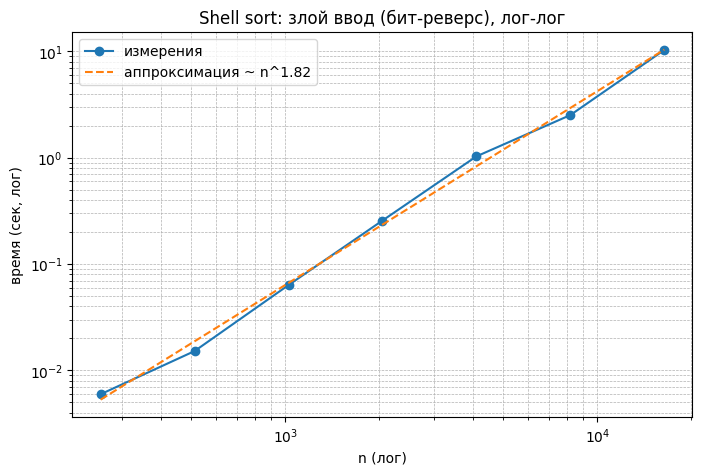

In [68]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt


# ---------------- Бит-реверсная перестановка (злой ввод) ----------------
def bit_reverse(x, bits):
    """Разворачивает биты числа x на указанное число бит."""
    y = 0
    for _ in range(bits):
        y = (y << 1) | (x & 1)
        x >>= 1
    return y

def generate_bitrev_worst_case(n):
    """
    Злой ввод для последовательности gap'ов степеней двойки.
    n должен быть степенью двойки. Возвращаем перестановку 0..n-1
    в порядке бит-реверса индексов.
    """
    assert (n & (n - 1)) == 0 and n > 0, "n must be a power of two"
    bits = n.bit_length() - 1
    # массив значений, который надо отсортировать по возрастанию
    # размещаем значения по индексам в бит-реверсном порядке
    arr = [0] * n
    for i in range(n):
        arr[i] = bit_reverse(i, bits)
    return arr

# ---------------- Измерение времени + аппроксимация ----------------
def median_time_for_n(n, trials=5):
    times = []
    for _ in range(trials):
        arr = generate_bitrev_worst_case(n)
        t0 = time.perf_counter()
        shell_sort(arr)  # классические gaps: n/2, n/4, ..., 1
        t1 = time.perf_counter()
        times.append(t1 - t0)
    times.sort()
    return times[len(times)//2]

# размеры только степени двойки (в силу конструкции worst-case)
sizes = [2**k for k in range(8, 15)]  # от 256 до 16384; увеличивай при желании
times = [median_time_for_n(n, trials=7) for n in sizes]

# лог-лог аппроксимация: log T = a * log n + b  => T ~ n^a
logn = np.log(sizes)
logt = np.log(times)
a, b = np.polyfit(logn, logt, 1)
fit = np.exp(a * logn + b)

print("sizes:", sizes)
print("times (s):", [round(t, 6) for t in times])
print(f"Fitted exponent a ≈ {a:.3f}  =>  time ≈ C * n^{a:.3f}")

# ---------------- График (лог-лог) ----------------
plt.figure(figsize=(8,5))
plt.plot(sizes, times, marker='o', label='измерения')
plt.plot(sizes, fit, linestyle='--', label=f'аппроксимация ~ n^{a:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n (лог)')
plt.ylabel('время (сек, лог)')
plt.title('Shell sort: злой ввод (бит-реверс), лог-лог')
plt.grid(True, which='both', ls='--', lw=0.5)
plt.legend()
plt.show()


<a id='task7'></a>
## 🧩 Задача №7. Массив анаграмм
---
### 📘 Описание

Дан массив строк strs. Сгруппируйте анаграммы вместе. Вы можете вернуть
ответ в любом порядке.

Анаграмма — это слово или фраза, полученная путем перестановки букв
другого слова или фразы, обычно с использованием всех исходных букв ровно
один раз.

---

In [ ]:
def groupAnagrams(strs):
    groups = {}

    for word in strs:    #O(n)
        freq = [0] * 26
        for ch in word:    #O(k)
            freq[ord(ch) - ord('a')] += 1
        
        key = tuple(freq)

        if key not in groups:    #O(1)
            groups[key] = []
        groups[key].append(word)
    
    return list(groups.values())


Идея решения создать хеш-таблицу, где под хеш-ключом будут храниться все анаграммы. 

Сложность O(n * k), n -количество слов, k - средняя длина слова